In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (42 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 84)                0         
                                                                 
 dense (Dense)               (None, 20)                1700      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,954
Trainable params: 1,954
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 1.3828 - accuracy: 0.2500
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 1s 967ms/step - loss: 1.3828 - accuracy: 0.2500 - val_loss: 1.4688 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 1.3804 - accuracy: 0.2222
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 1.3804 - accuracy: 0.2222 - val_loss: 1.4587 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 1.3662 - accuracy: 0.2778
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 55ms/step - loss: 1.3662 - accuracy: 0.2778 - val_loss: 1.4480 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 1.3736 - accuracy: 0.2778

1/1 [==============================] - ETA: 0s - loss: 1.2396 - accuracy: 0.3889
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 84ms/step - loss: 1.2396 - accuracy: 0.3889 - val_loss: 1.2339 - val_accuracy: 0.2500
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 1.2433 - accuracy: 0.4167
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 66ms/step - loss: 1.2433 - accuracy: 0.4167 - val_loss: 1.2272 - val_accuracy: 0.2500
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 1.2142 - accuracy: 0.5833
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 1.2142 - accuracy: 0.5833 - val_loss: 1.2208 - val_accuracy: 0.2500
Epoch 31/1000
1/1 [==============================] - ETA: 0s - loss: 1.2249 - accuracy: 0.5000
Epoch 31: saving mo

1/1 [==============================] - 0s 48ms/step - loss: 1.0895 - accuracy: 0.4722 - val_loss: 1.0674 - val_accuracy: 0.2500
Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 1.0393 - accuracy: 0.5000
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 54ms/step - loss: 1.0393 - accuracy: 0.5000 - val_loss: 1.0608 - val_accuracy: 0.2500
Epoch 57/1000
1/1 [==============================] - ETA: 0s - loss: 1.0572 - accuracy: 0.5556
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 68ms/step - loss: 1.0572 - accuracy: 0.5556 - val_loss: 1.0545 - val_accuracy: 0.2500
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 1.0643 - accuracy: 0.6111
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 1.0643 - accuracy: 0.6111 - val_loss: 1.

Epoch 83/1000
1/1 [==============================] - ETA: 0s - loss: 0.9195 - accuracy: 0.5556
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 89ms/step - loss: 0.9195 - accuracy: 0.5556 - val_loss: 0.9125 - val_accuracy: 0.5000
Epoch 84/1000
1/1 [==============================] - ETA: 0s - loss: 0.9414 - accuracy: 0.4444
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.9414 - accuracy: 0.4444 - val_loss: 0.9052 - val_accuracy: 0.5833
Epoch 85/1000
1/1 [==============================] - ETA: 0s - loss: 0.9606 - accuracy: 0.4167
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 99ms/step - loss: 0.9606 - accuracy: 0.4167 - val_loss: 0.8971 - val_accuracy: 0.5833
Epoch 86/1000
1/1 [==============================] - ETA: 0s - loss: 0.9827 - accuracy: 0.5000
Epoch

1/1 [==============================] - ETA: 0s - loss: 0.9139 - accuracy: 0.5278
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.9139 - accuracy: 0.5278 - val_loss: 0.7391 - val_accuracy: 0.5833
Epoch 111/1000
1/1 [==============================] - ETA: 0s - loss: 0.7873 - accuracy: 0.6111
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.7873 - accuracy: 0.6111 - val_loss: 0.7348 - val_accuracy: 0.5833
Epoch 112/1000
1/1 [==============================] - ETA: 0s - loss: 0.7443 - accuracy: 0.6944
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 0.7443 - accuracy: 0.6944 - val_loss: 0.7299 - val_accuracy: 0.5833
Epoch 113/1000
1/1 [==============================] - ETA: 0s - loss: 0.7403 - accuracy: 0.5278
Epoch 113: sa

1/1 [==============================] - ETA: 0s - loss: 0.7447 - accuracy: 0.5556
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 0.7447 - accuracy: 0.5556 - val_loss: 0.6790 - val_accuracy: 0.5833
Epoch 138/1000
1/1 [==============================] - ETA: 0s - loss: 0.8248 - accuracy: 0.5000
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 0.8248 - accuracy: 0.5000 - val_loss: 0.6767 - val_accuracy: 0.5833
Epoch 139/1000
1/1 [==============================] - ETA: 0s - loss: 0.7885 - accuracy: 0.5278
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 0.7885 - accuracy: 0.5278 - val_loss: 0.6748 - val_accuracy: 0.6667
Epoch 140/1000
1/1 [==============================] - ETA: 0s - loss: 0.7860 - accuracy: 0.6111
Epoch 140: sa

1/1 [==============================] - ETA: 0s - loss: 0.7258 - accuracy: 0.6389
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 0.7258 - accuracy: 0.6389 - val_loss: 0.6391 - val_accuracy: 0.6667
Epoch 165/1000
1/1 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 0.7222
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.6795 - accuracy: 0.7222 - val_loss: 0.6382 - val_accuracy: 0.6667
Epoch 166/1000
1/1 [==============================] - ETA: 0s - loss: 0.7894 - accuracy: 0.5833
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 0.7894 - accuracy: 0.5833 - val_loss: 0.6369 - val_accuracy: 0.6667
Epoch 167/1000
1/1 [==============================] - ETA: 0s - loss: 0.7685 - accuracy: 0.4722
Epoch 167: sa

1/1 [==============================] - ETA: 0s - loss: 0.7826 - accuracy: 0.5000
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.7826 - accuracy: 0.5000 - val_loss: 0.6296 - val_accuracy: 0.7500
Epoch 192/1000
1/1 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.5833
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 112ms/step - loss: 0.7626 - accuracy: 0.5833 - val_loss: 0.6314 - val_accuracy: 0.6667
Epoch 193/1000
1/1 [==============================] - ETA: 0s - loss: 0.7339 - accuracy: 0.5833
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 67ms/step - loss: 0.7339 - accuracy: 0.5833 - val_loss: 0.6324 - val_accuracy: 0.5833
Epoch 194/1000
1/1 [==============================] - ETA: 0s - loss: 0.7512 - accuracy: 0.6667
Epoch 194: s

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 18ms/step - loss: 0.6239 - accuracy: 0.8333


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 101ms/step
[3.2732889e-04 6.0673493e-01 3.8673705e-01 6.2007029e-03]
1


# Confusion matrix

1/1 [==============================] - 0s 21ms/step


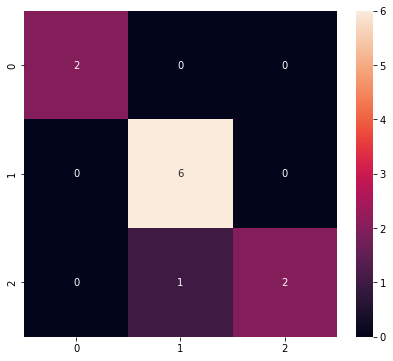

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         0

    accuracy                           0.83        12
   macro avg       0.71      0.58      0.63        12
weighted avg       0.93      0.83      0.86        12



C:\Users\facut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\facut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\facut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmp80cj6aub\assets


4896

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.3073325e-04 6.0642713e-01 3.8700622e-01 6.2359492e-03]
1
